In [330]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [331]:
mu_1, mu_2 = 0., 4.
sigma_1, sigma_2 = 1., 2.



mu = ((sigma_1**-2)*mu_1 + (sigma_2**-2)*mu_2) / \
    (sigma_1**-2 + sigma_2**-2)
sigma = np.sqrt((sigma_1**2 * sigma_2**2) / (sigma_1**2 + sigma_2**2))

nu = 1
f = 2.6
L_f = norm.pdf(f, mu_2, sigma_2)
f_p = -0.5
L_fp = norm.pdf(f_p, mu_2, sigma_2)
f_pp = 4.5
L_fpp = norm.pdf(f_pp, mu_2, sigma_2)
y = L_f * 0.55

f_size = (10, 6)
f_dpi = 300

c_target = (0.1215686, 0.4666667, 0.70588235)
c_likeli = (0.8392157, 0.1529411, 0.1568627)
c_norm = (1.0, 0.498039, 0.05490196)
c_fp ='black'



r = np.linspace(-4., 8., num=1000)

In [332]:
def plot_gen_pic(f_size, c_target, c_likeli, c_norm):
    plt.figure(figsize=(f_size))
    plt.plot(r, norm.pdf(r, mu, sigma),
             label='target distribution', c=c_target)
    plt.plot(r, norm.pdf(r, mu_1, sigma_1),
             label='$\mathcal{N}(0, \Sigma)$', c=c_norm)
    plt.plot(r, norm.pdf(r, mu_2, sigma_2), label='likelihood', c=c_likeli)
    plt.plot(nu, 0, 'P', markersize=12, c=c_norm, label=r'$\nu$')
    plt.plot(f, 0, 'X', markersize=12, c=c_target, label='current state f')  
    plt.xlabel('sample')
    plt.ylabel('value')
    plt.xlim(-4.,8.)
    plt.grid()
    plt.legend()

## Step 1 - compute nu

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


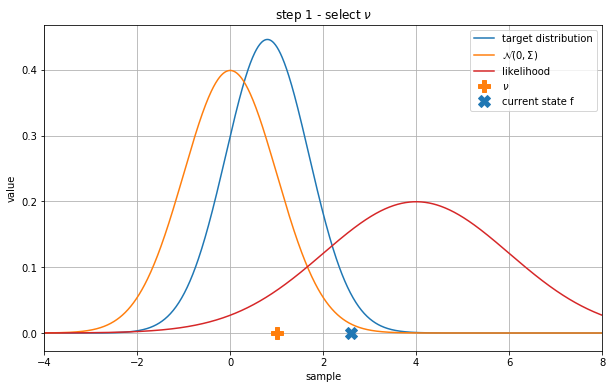

In [333]:
# step 1 - select nu
plot_gen_pic(f_size, c_target, c_likeli, c_norm)

plt.title(r'step 1 - select $\nu$')
plt.plot(f, 0, 'o', c=c_target)                 # plot f as initial state
plt.scatter(nu, 0, c=c_norm)
plt.savefig('ess_step_01.png', dpi=f_dpi)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


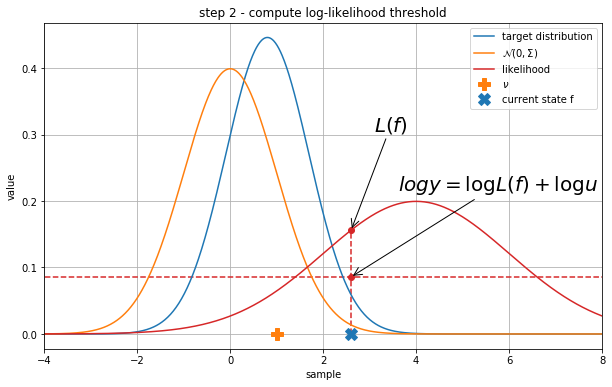

In [334]:
# step 2 - calculate y
plot_gen_pic(f_size, c_target, c_likeli, c_norm)
plt.title(r'step 2 - compute log-likelihood threshold')

# points/lines
plt.scatter(f, L_f, c=c_likeli)
plt.scatter(f, y,  c=c_likeli)
plt.vlines([f], 0, L_f, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=-4.5, xmax=8, linestyles='dashed', colors=c_likeli)

# arrows to points
plt.annotate("$L(f)$", xy=(f, L_f), xytext=(
    f+0.5, L_f+0.15), arrowprops=dict(arrowstyle="->"), size=20)
plt.annotate("$log y = \log L(f) + \log u $", xy=(f, y),
             xytext=(f+1, y+0.13), arrowprops=dict(arrowstyle="->"), size=20)

plt.savefig('ess_step_02.png', dpi=f_dpi)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


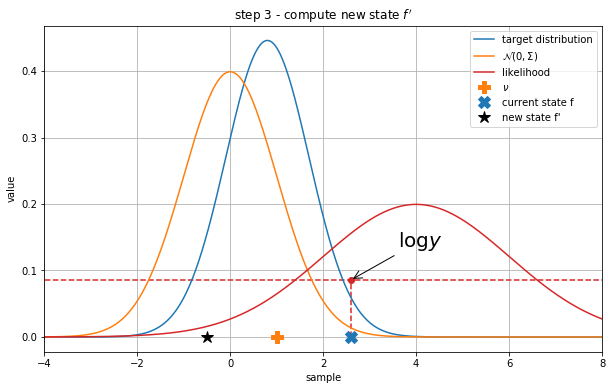

In [335]:
# step 3
plot_gen_pic(f_size, c_target, c_likeli, c_norm)
plt.title(r"step 3 - compute new state $f'$")

## new state
plt.plot(f_p, 0, '*', markersize=12, c=c_fp, label="new state f'")
plt.legend()

## log y
plt.scatter(f, y,  c=c_likeli)
plt.vlines([f], 0, y, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=-4.5, xmax=8, linestyles='dashed', colors=c_likeli)

plt.annotate("$\log y $", xy=(f, y),
             xytext=(f+1, y+0.05), arrowprops=dict(arrowstyle="->"), size=20)

plt.savefig('ess_step_03.png', dpi=f_dpi)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


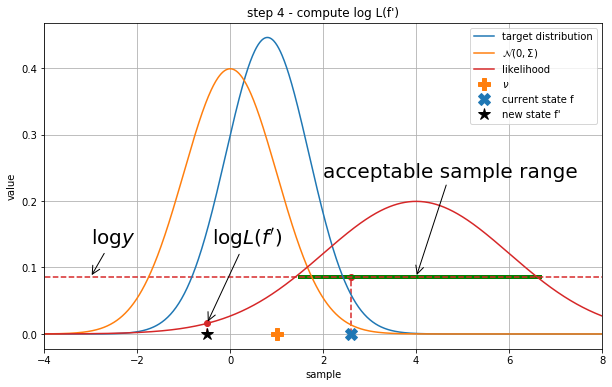

In [336]:
# step 4 - calculate L(f')
plot_gen_pic(f_size, c_target, c_likeli, c_norm)
plt.title(r"step 4 - compute log L(f')")

## new state
plt.plot(f_p, 0, '*', markersize=12, c=c_fp, label="new state f'")
plt.plot(f_p, L_fp, 'o', c=c_likeli)
plt.vlines([f_p], 0, L_fp, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=1.45, xmax=6.7, colors='g', linewidth=4)
plt.legend()

## log y
plt.scatter(f, y,  c=c_likeli)
plt.vlines([f], 0, y, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=-4.5, xmax=8, linestyles='dashed', colors=c_likeli)

plt.annotate("$\log y $", xy=(-3, y),
             xytext=(-3, y+0.05), arrowprops=dict(arrowstyle="->"), size=20)
plt.annotate("$\log L(f')$", xy=(f_p, L_fp),
             xytext=(f_p+0.1, y+0.05), arrowprops=dict(arrowstyle="->"), size=20)
plt.annotate("acceptable sample range", xy=(4, y),
             xytext=(2, y+0.15), arrowprops=dict(arrowstyle="->"), size=20)             

plt.savefig('ess_step_04.png', dpi=f_dpi)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


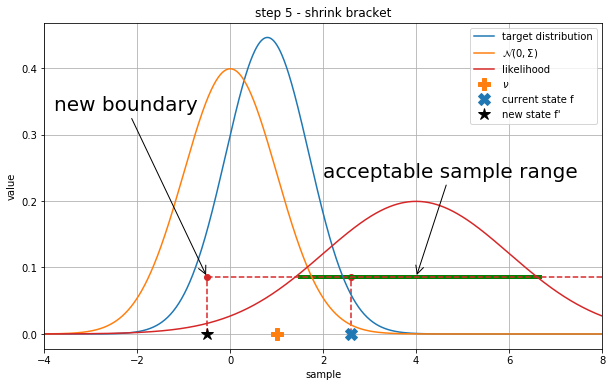

In [337]:
# step 5 - shrink bracket
plot_gen_pic(f_size, c_target, c_likeli, c_norm)
plt.title(r"step 5 - shrink bracket")

## new state
plt.plot(f_p, 0, '*', markersize=12, c=c_fp, label="new state f'")
plt.plot(f_p, y, 'o', c=c_likeli)
plt.vlines([f_p], 0, y, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=1.45, xmax=6.7, colors='g', linewidth=4)
plt.legend()

## log y
plt.scatter(f, y,  c=c_likeli)
plt.vlines([f], 0, y, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=f_p, xmax=8, linestyles='dashed', colors=c_likeli)

plt.annotate("new boundary", xy=(f_p, y),
             xytext=(f_p-3.3, y+0.25), arrowprops=dict(arrowstyle="->"), size=20)
plt.annotate("acceptable sample range", xy=(4, y),
             xytext=(2, y+0.15), arrowprops=dict(arrowstyle="->"), size=20)             

plt.savefig('ess_step_05.png', dpi=f_dpi)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


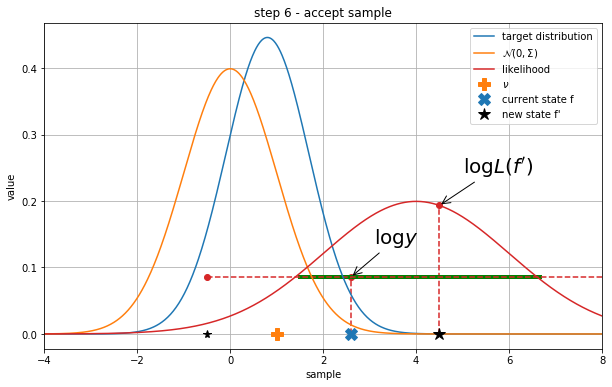

In [338]:
# step 6 - accept
plot_gen_pic(f_size, c_target, c_likeli, c_norm)
plt.title(r"step 6 - accept sample")

## new state
plt.plot(f_p, 0, '*', markersize=8, c=c_fp)
plt.plot(4.5, 0, '*', markersize=12, c=c_fp, label="new state f'")

plt.plot(f_p, y, 'o', c=c_likeli)
plt.plot(f_pp, L_fpp, 'o', c=c_likeli)
plt.vlines([f_pp], 0, L_fpp, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=1.45, xmax=6.7, colors='g', linewidth=4)
plt.legend()

## log y
plt.scatter(f, y,  c=c_likeli)
plt.vlines([f], 0, y, linestyles='dashed', colors=c_likeli)
plt.hlines(y=y, xmin=f_p, xmax=8, linestyles='dashed', colors=c_likeli)

plt.annotate("$\log y $", xy=(f, y),
             xytext=(f+0.5, y+0.05), arrowprops=dict(arrowstyle="->"), size=20)    
plt.annotate("$\log L(f')$", xy=(f_pp, L_fpp),
             xytext=(f_pp+0.5, L_fpp+0.05), arrowprops=dict(arrowstyle="->"), size=20)        

plt.savefig('ess_step_06.png', dpi=f_dpi)
plt.show()